In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import cv2 as cv

from tensorflow.keras.preprocessing.image import load_img
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
path = '/content/aug_227_6097668.jpg'

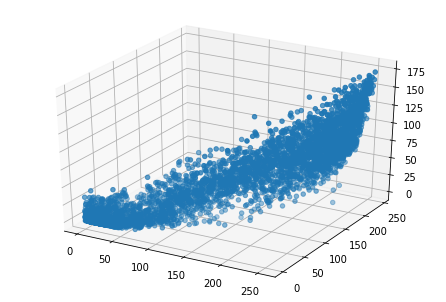

In [ ]:
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
r,g,b = cv.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b, )
plt.show()

### Color Quantization using K-Means (cv2)

In [ ]:
# Sample
img = cv.imread(path)
Z = img.reshape(-1, 3)    # (64 x 64 x 3) -> (4096 x 3)
Z = np.float32(Z)    # uint8 -> float32

# Define criteria, number of clusters(K) and apply kmeans()
## Criteria (type of termination, max_iter, epsilon)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K=3

## Output kmeans -> (compactness, label, center)
ret, label, center = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
img_q = center[label.flatten()]
img_q = img_q.reshape((img.shape))

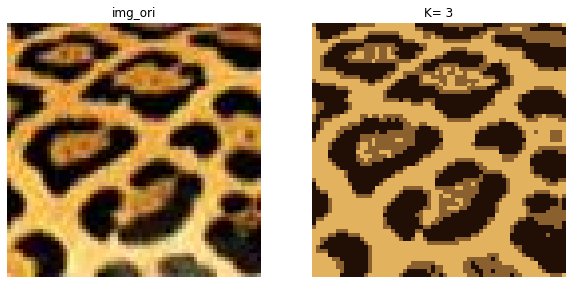

In [ ]:
# Plotting
img_ori = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_q = cv.cvtColor(img_q, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_ori), ax[0].axis('off'), ax[0].set_title('img_ori')
ax[1].imshow(img_q), ax[1].axis('off'), ax[1].set_title('K= {}'.format(str(K)))
plt.show()

### Color Quantization using K-Means (sklearn)

In [ ]:
# Sample
img = cv.imread(path)
img_flat = img.reshape(-1, 3)    # (64 x 64 x 3) -> (4096 x 3)
img_flat = np.float32(img_flat)    # uint8 -> float32

# K-Means
K = 3
kmeans = KMeans(n_clusters=K, n_init=10, max_iter=10, random_state=0).fit(img_flat)
center = kmeans.cluster_centers_
label = kmeans.labels_

# Now convert back into uint8, and make original image
center = np.uint8(center)
img_q = center[label.flatten()]
img_q = img_q.reshape((img.shape))

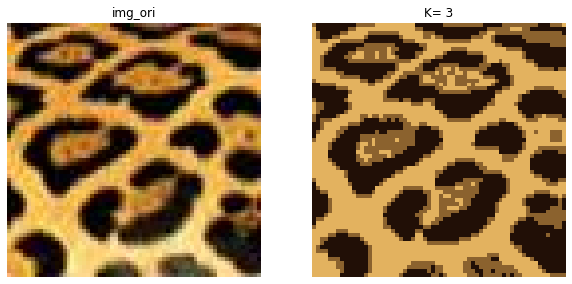

In [ ]:
# Plotting
img_ori = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_q = cv.cvtColor(img_q, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_ori), ax[0].axis('off'), ax[0].set_title('img_ori')
ax[1].imshow(img_q), ax[1].axis('off'), ax[1].set_title('K= {}'.format(str(K)))
plt.show()

### Elbow Method

In [ ]:
def clustering(img, k):
    img_flat = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=10, random_state=0).fit(img_flat)
    center = kmeans.cluster_centers_
    label = kmeans.labels_

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    img_q = center[label.flatten()]
    img_q = img_q.reshape((img.shape))
    return img_q, kmeans.inertia_

In [ ]:
k_numbers = list(range(2,21,2))
inertia = []
img_list = []
for k in k_numbers:
    img_q, iner_k = clustering(img,k)
    img_list.append(img_q)
    inertia.append(iner_k)

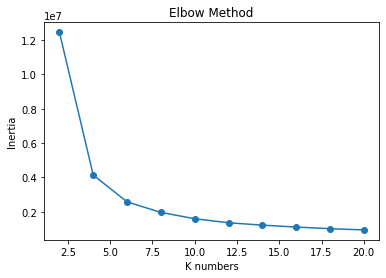

In [ ]:
plt.plot(k_numbers,inertia, marker='o')
#plt.scatter(k_numbers,inertia)
plt.xlabel('K numbers')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Compare several segmentation methods

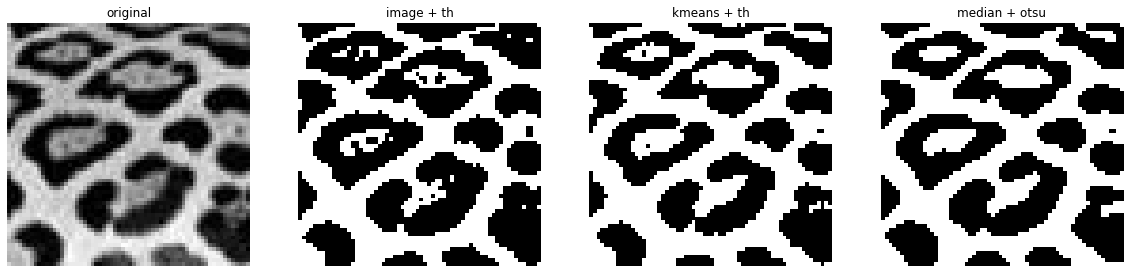

In [ ]:
# Threshold
_, th1 = cv.threshold(img_ori, 127, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold(img_q, 127, 255, cv.THRESH_BINARY)
lol = [image, th1, th2, otsu]
titles = ['original', 'image + th', 'kmeans + th', 'median + otsu']
plt.figure(figsize=(20,5))
for i in range(4):
    plt.subplot(1,4,i+1), plt.imshow(lol[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.show()